In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 

In [2]:
def get_csv_files_in_folder(folder_path):
    # Initialize an empty list to store the file paths
    csv_file_paths = []
    
    # List all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a CSV file
        if filename.endswith('.csv'):
            # Create the full file path by joining the folder path and the file name
            full_file_path = os.path.join(folder_path, filename)
            
            # Add the full file path to the list
            csv_file_paths.append(full_file_path)
    
    return csv_file_paths


In [3]:
folder_path = './Data/'  
csv_file_paths = get_csv_files_in_folder(folder_path)
csv_file_paths

['./Data/data_sample_a.csv',
 './Data/data_sample_b.csv',
 './Data/data_sample_c.csv',
 './Data/data_sample_d.csv',
 './Data/data_sample_e.csv',
 './Data/data_sample_f.csv',
 './Data/data_sample_g.csv']

In [4]:
# Dictionary to store summary statistics for each dataset
summary_statistics = {}

# Loop through each file path and generate summary statistics
for i, file_path in enumerate(csv_file_paths):
    df = pd.read_csv(file_path)
    summary_statistics[f'Sample_{chr(65 + i)}'] = df.describe()

# Show summary statistics for the first dataset as an example
summary_statistics['Sample_A']


,x(um),y(um),Vx(mm/s),Vy(mm/s),Circular variance,particle numbers
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,98.512500,-98.512500,1.347204,29.124657,0.158467,4.684432
std,117.565485,87.188897,69.548116,58.915227,0.258714,7.838611
min,-98.512500,-242.997500,-241.647222,-315.240000,0.000000,0.000000
25%,-6.567500,-177.322500,0.000000,0.000000,0.000000,0.000000
50%,98.512500,-98.512500,0.000000,0.000000,0.000000,0.000000
75%,203.592500,-19.702500,0.000000,66.550667,0.261431,8.000000
max,295.537500,45.972500,249.226492,262.700000,0.977145,45.000000


In [5]:
# List of variables to plot
variables = ['x(um)', 'y(um)', 'Vx(mm/s)', 'Vy(mm/s)', 'Circular variance', 'particle numbers']


In [6]:
# Dictionary to store DataFrames for each dataset
dfs = {}

# Loop through each file path and load the data into DataFrames
for i, file_path in enumerate(csv_file_paths):
    dfs[f'Sample_{chr(65 + i)}'] = pd.read_csv(file_path)

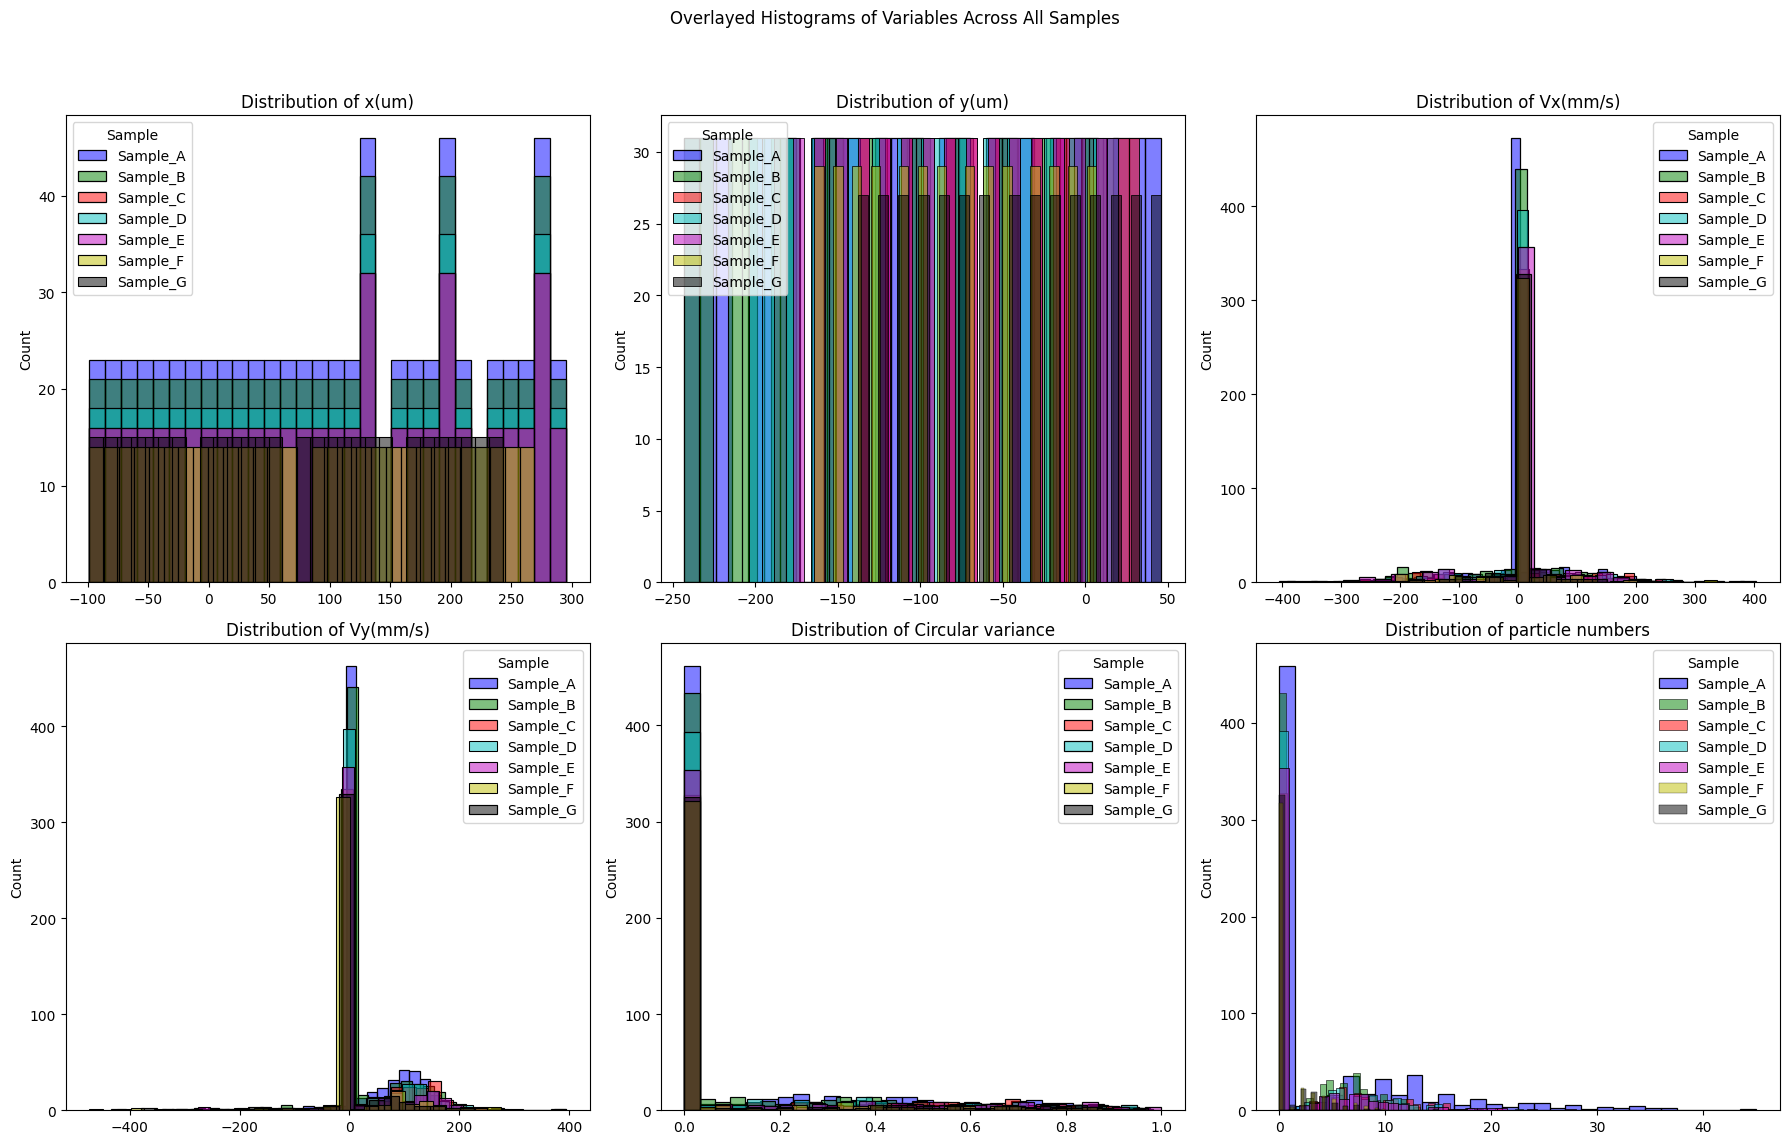

In [7]:
# Create a 2x3 grid of subplots for histograms with better color differentiation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Overlayed Histograms of Variables Across All Samples')

# Define a list of distinct colors for each sample
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Loop through each variable and plot overlayed histograms with different colors for each sample
for var, ax in zip(variables, axes.flatten()):
    for color, (sample, df) in zip(colors, dfs.items()):
        sns.histplot(df[var].values, bins=30, kde=False, ax=ax, label=sample, color=color, alpha=0.5)
    ax.legend(title='Sample')
    ax.set_title(f'Distribution of {var}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


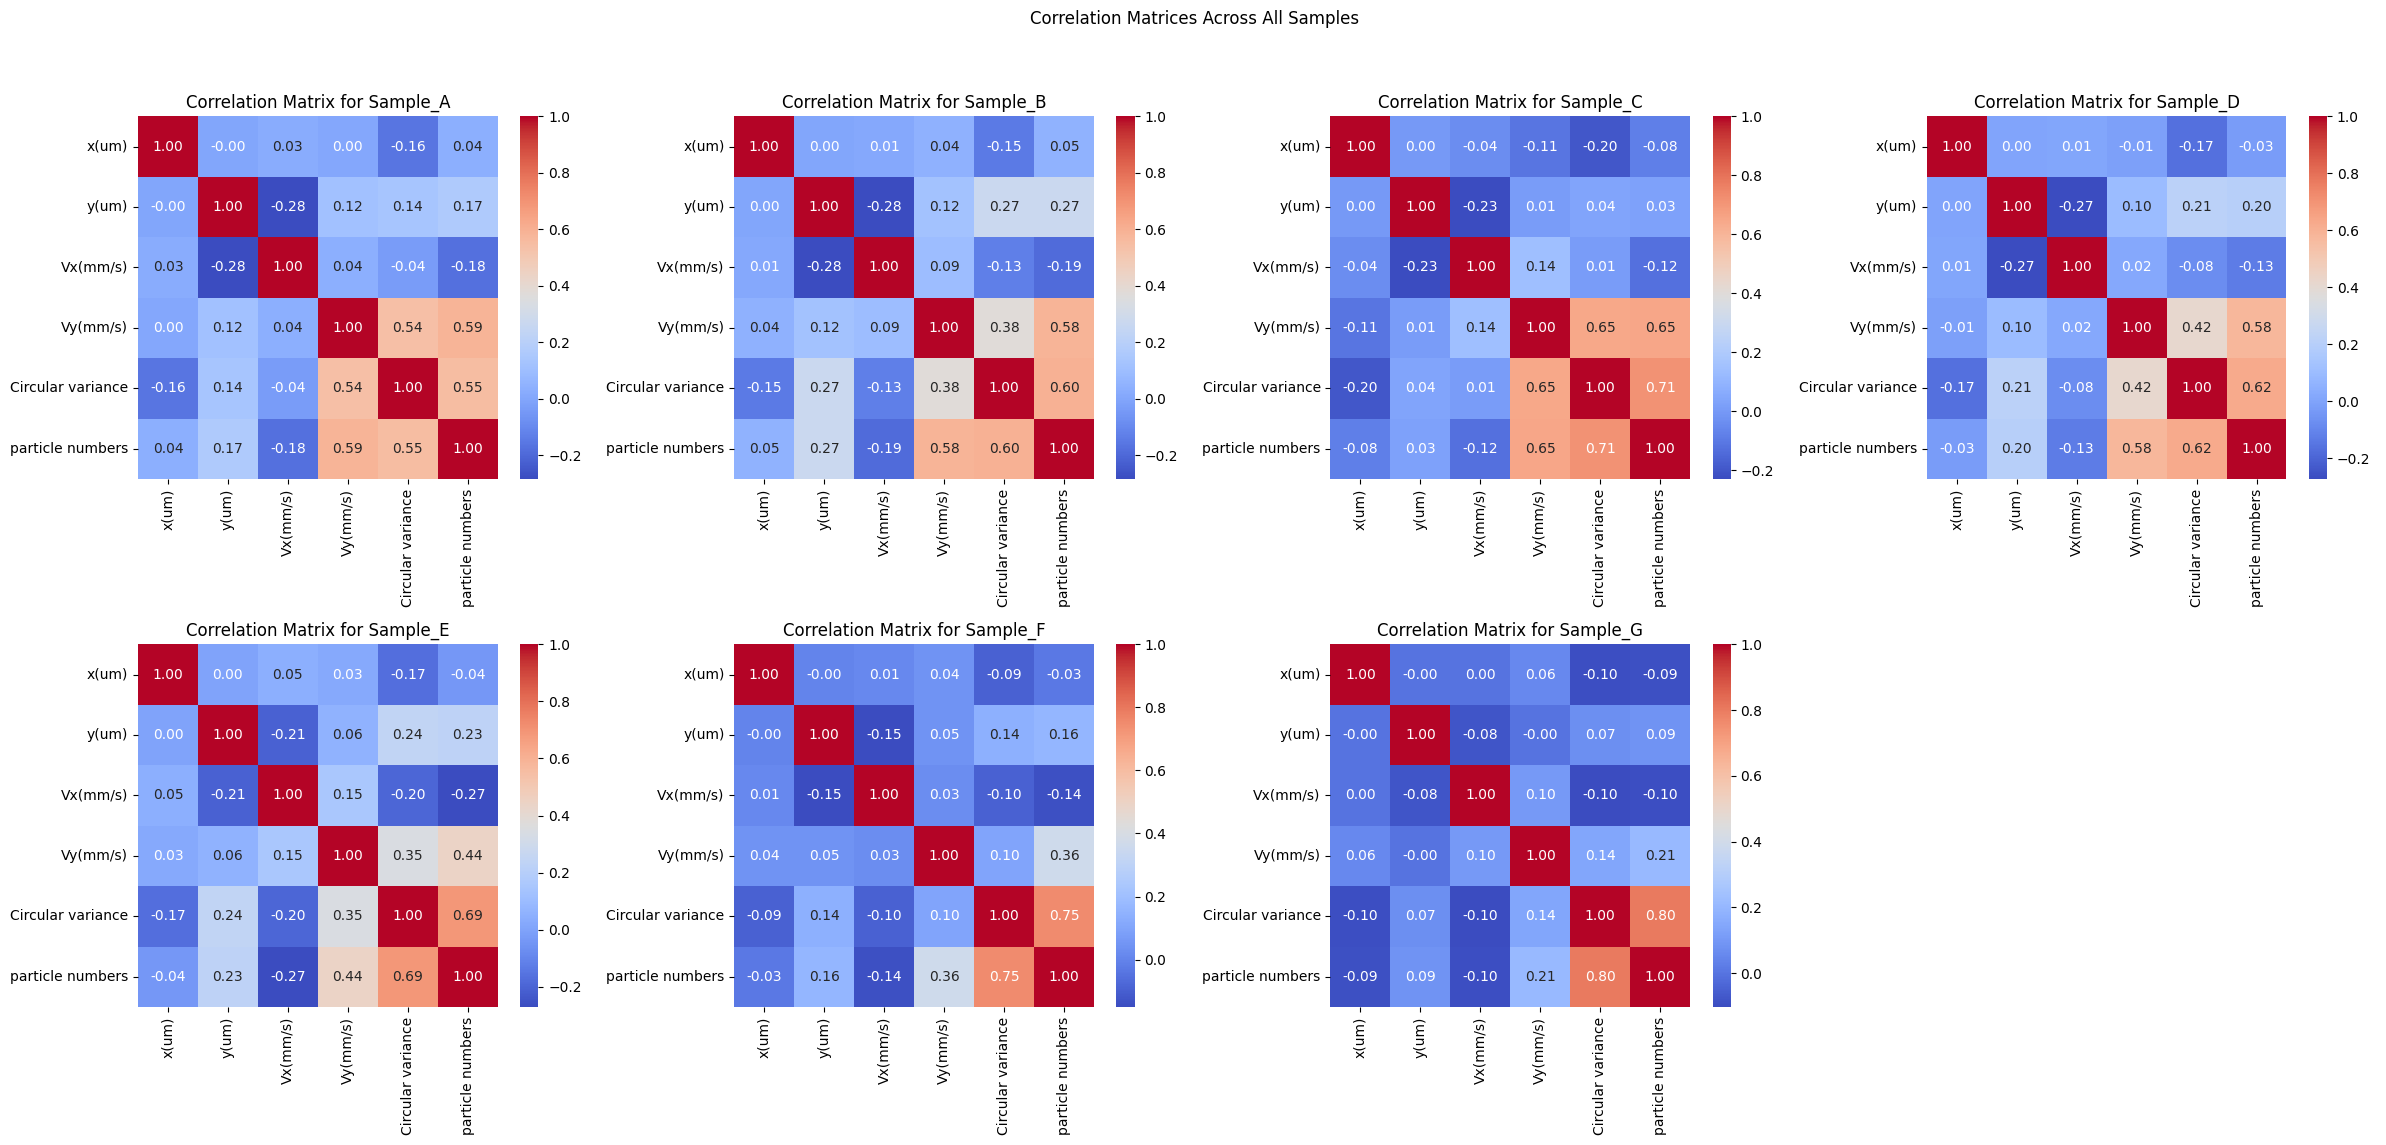

In [8]:
# Create a subplot grid for the correlation matrices
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
fig.suptitle('Correlation Matrices Across All Samples')

# Loop through each DataFrame to calculate and plot the correlation matrix
for ax, (sample, df) in zip(axes.flatten(), dfs.items()):
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f'Correlation Matrix for {sample}')

# Remove the unused subplot
axes[-1, -1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

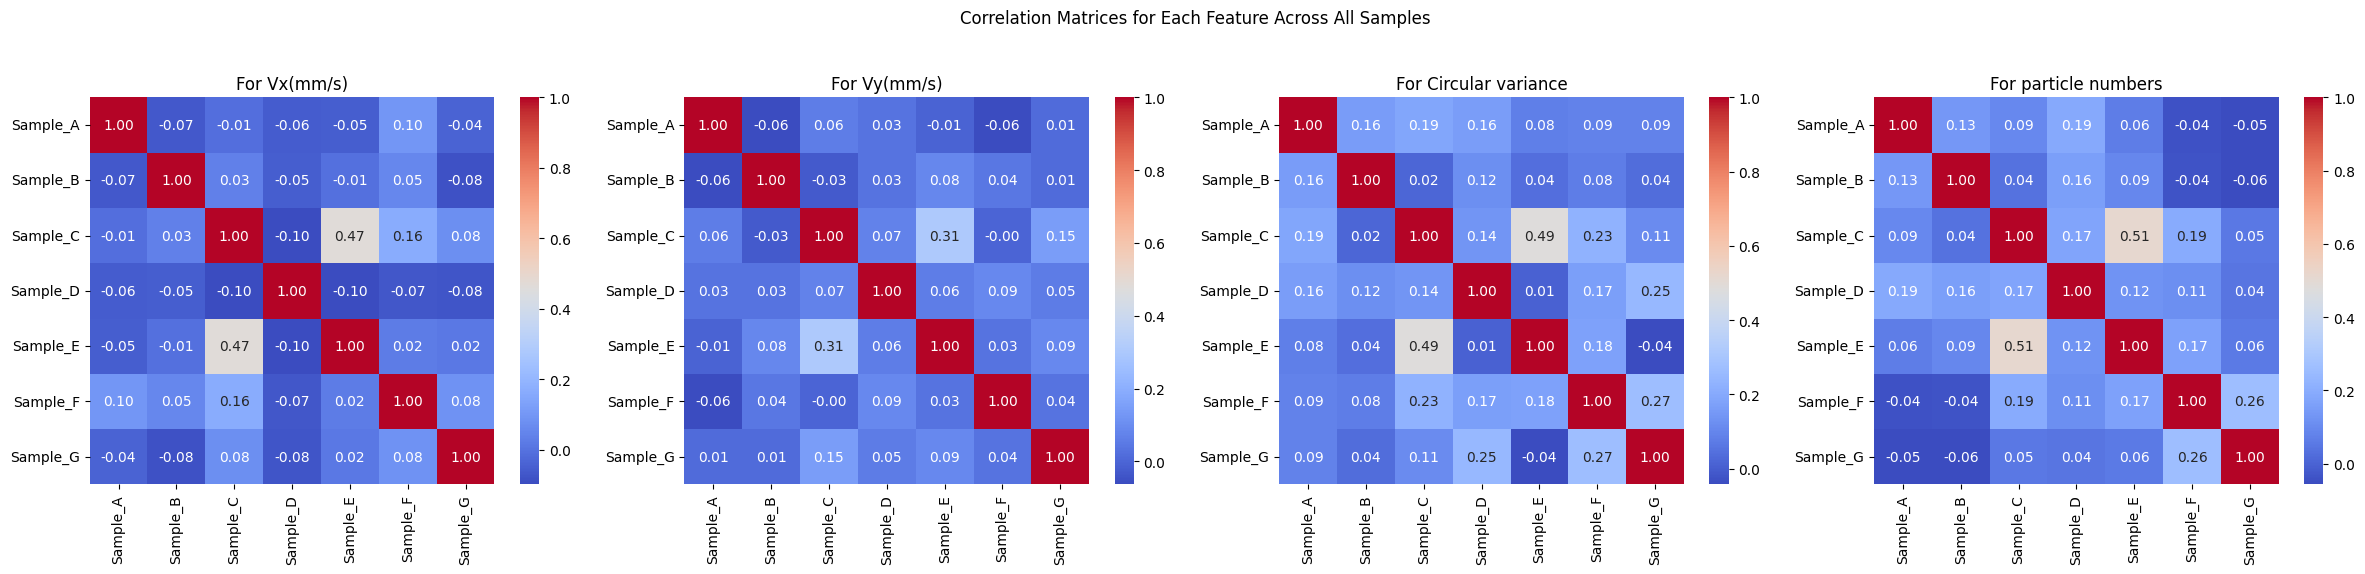

In [9]:
# Create DataFrames to store each feature's values from each dataset and calculate their correlation matrices
feature_corr_matrices = {}

features = ['Vx(mm/s)', 'Vy(mm/s)', 'Circular variance', 'particle numbers']

for feature in features:
    feature_df = pd.DataFrame({sample: df[feature] for sample, df in dfs.items()})
    feature_df = feature_df.dropna()
    feature_corr_matrices[feature] = feature_df.corr()

# Plot the correlation matrices for each feature
fig, axes = plt.subplots(1, len(features), figsize=(24, 6))
fig.suptitle('Correlation Matrices for Each Feature Across All Samples')

for ax, (feature, corr_matrix) in zip(axes, feature_corr_matrices.items()):
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    ax.set_title(f"For {feature}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


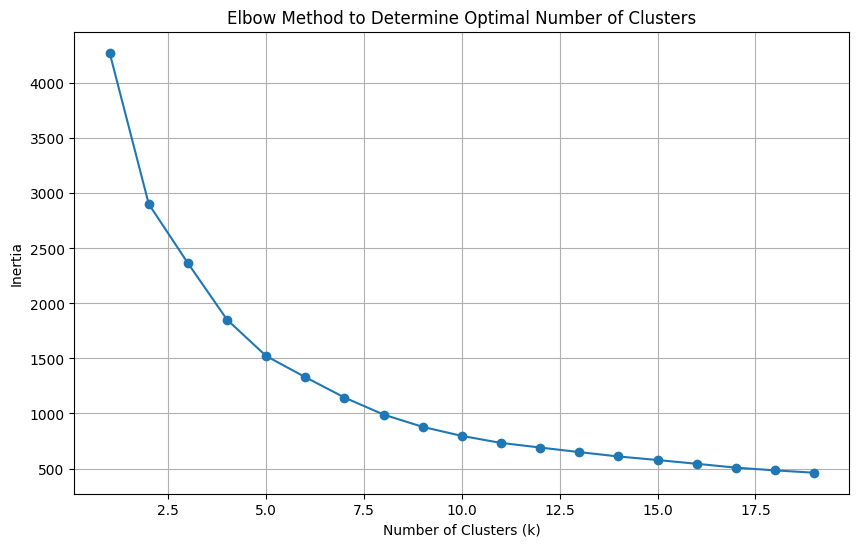

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select Sample_A for the clustering analysis
df_cluster = dfs['Sample_A'].copy()

# Standardize the data to make it suitable for clustering analysis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()


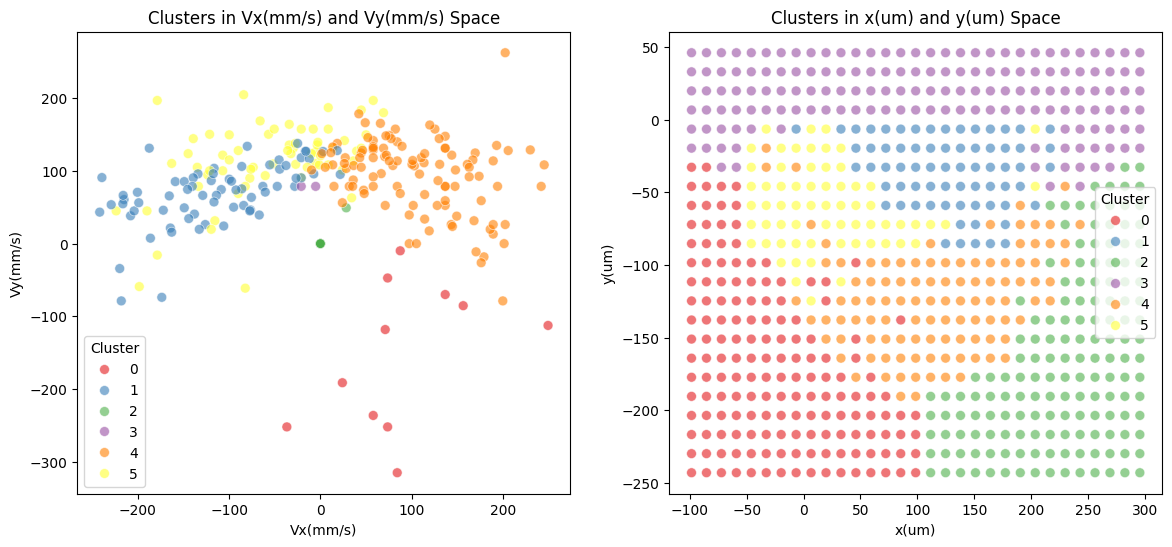

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply K-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters using some feature combinations
plt.figure(figsize=(14, 6))

# Scatter plot for 'Vx(mm/s)' and 'Vy(mm/s)'
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_cluster, x='Vx(mm/s)', y='Vy(mm/s)', hue='Cluster', palette='Set1', s=50, alpha=0.6)
plt.title('Clusters in Vx(mm/s) and Vy(mm/s) Space')

# Scatter plot for 'x(um)' and 'y(um)'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_cluster, x='x(um)', y='y(um)', hue='Cluster', palette='Set1', s=50, alpha=0.6)
plt.title('Clusters in x(um) and y(um) Space')

plt.show()


In [20]:
import scipy.stats as stats

# Create an empty list to store the 'Vx(mm/s)' values of each cluster
vx_cluster_values = []

# Loop through each cluster to collect 'Vx(mm/s)' values
for cluster in range(6):
    vx_values = df_cluster[df_cluster['Cluster'] == cluster]['Vx(mm/s)']
    vx_cluster_values.append(vx_values)

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*vx_cluster_values)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 271.22048969189
P-value: 1.0363926303977511e-161


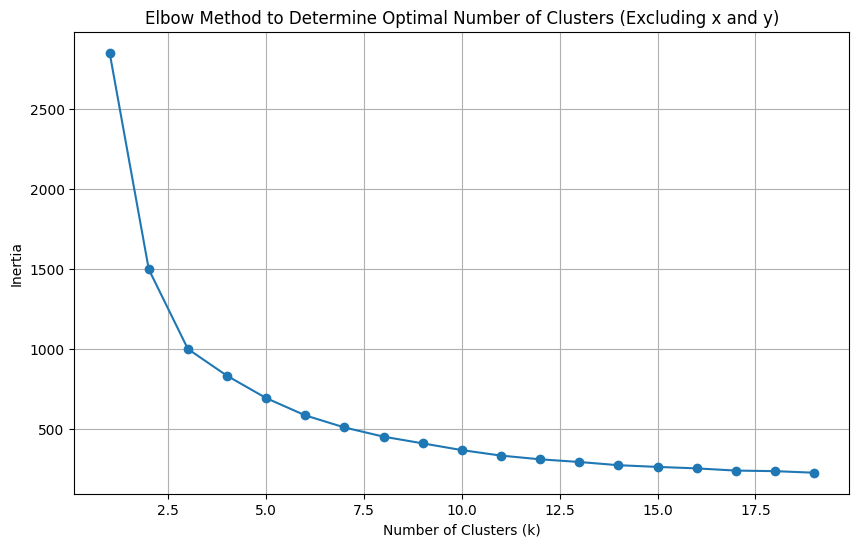

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select Sample_A for the clustering analysis and exclude 'x' and 'y'
df_cluster = dfs['Sample_A'].drop(columns=['x(um)', 'y(um)']).copy()

# Standardize the data to make it suitable for clustering analysis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters (Excluding x and y)')
plt.grid(True)
plt.show()


F-statistic: 722.0900271153085
P-value: 7.613838391311991e-172


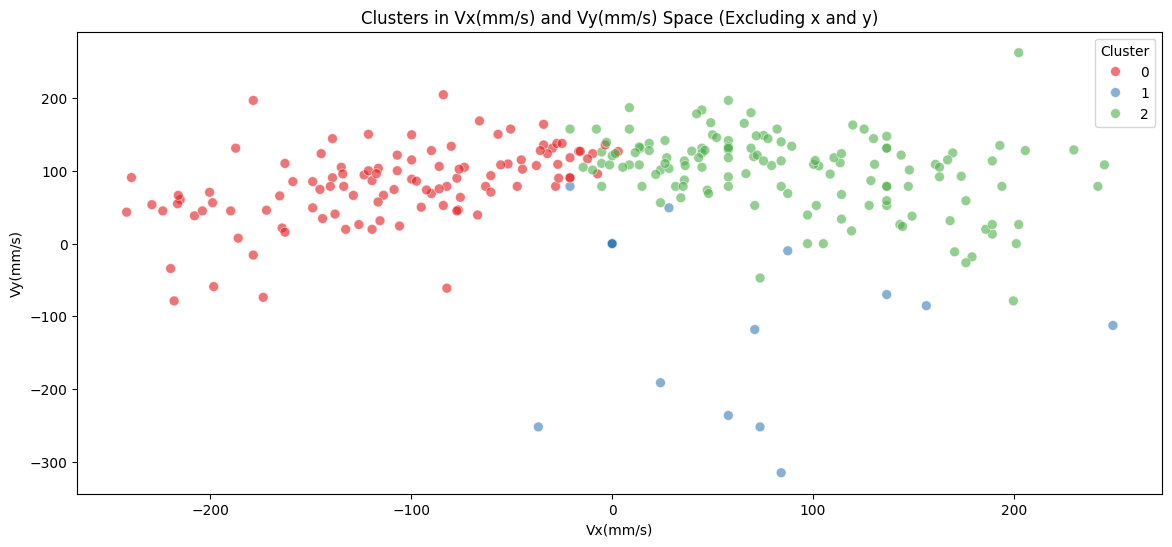

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Perform one-way ANOVA on 'Vx(mm/s)'
vx_cluster_values = []
for cluster in range(3):
    vx_values = df_cluster[df_cluster['Cluster'] == cluster]['Vx(mm/s)']
    vx_cluster_values.append(vx_values)

f_stat, p_value = stats.f_oneway(*vx_cluster_values)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Plotting clusters for 'Vx(mm/s)' and 'Vy(mm/s)'
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_cluster, x='Vx(mm/s)', y='Vy(mm/s)', hue='Cluster', palette='Set1', s=50, alpha=0.6)
plt.title('Clusters in Vx(mm/s) and Vy(mm/s) Space (Excluding x and y)')
plt.show()


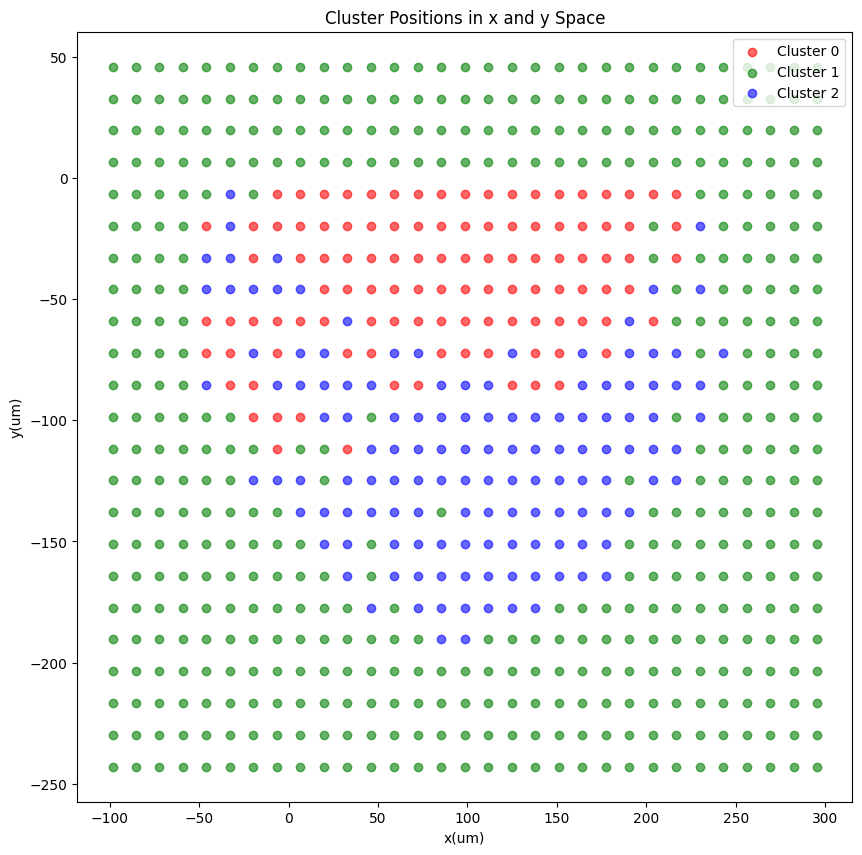

In [23]:
# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Assume 'cluster_labels' contains the cluster labels assigned by K-means when k=3
# You can add this column to the original DataFrame that includes x and y
dfs['Sample_A']['Cluster_Labels'] = df_cluster['Cluster']

# Create a scatter plot for the x and y positions colored by the cluster labels
plt.figure(figsize=(10, 10))
colors = ['red', 'green', 'blue']
for i in range(3):
    subset = dfs['Sample_A'][dfs['Sample_A']['Cluster_Labels'] == i]
    plt.scatter(subset['x(um)'], subset['y(um)'], c=colors[i], label=f'Cluster {i}', alpha=0.6)
    
plt.xlabel('x(um)')
plt.ylabel('y(um)')
plt.title('Cluster Positions in x and y Space')
plt.legend()
plt.show()
